# Problem Set 3, due Feb 12 at 10:30am.

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates. The timeline
of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre"|
|progresa |treatment = "basal"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|


## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation, and number of missings) for all of
the demographic variables in the dataset (i.e., everything except
year, folnum, village).  Present the actual levels for 'progresa' and
'poor'.  Do these fit with the documentation above?

Present these in a single table alphabetized
by variable name. Do NOT simply expect the grader to scroll through
your output!

In [2]:
# your code here
import pandas as pd
import numpy as np

data = pd.read_table('progresa_sample.csv', sep = ",").drop(['year', 'folnum', 'village'], axis=1)
data['poor'] = (data['poor'] == 'pobre').astype(int)
data['progresa'] = (data['progresa'] == 'basal').astype(int)
data2 = data.describe()[1:3].T
data2['missing'] = data.isnull().sum()
data2

,mean,std,missing
sex,0.512211,0.499854,24
indig,0.298324,0.457525,300
dist_sec,2.418910,2.234109,0
sc,0.819818,0.384342,8453
grc,3.963537,2.499063,6549
fam_n,7.215715,2.352900,0
min_dist,103.447520,42.089441,0
dist_cap,147.674452,76.063134,0
poor,0.846498,0.360473,0
progresa,0.615663,0.486441,0


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages? Hint: Use a T-Test to
determine whether there is a statistically significant difference in
the average values of each of the variables in the dataset. Focus only
on the data from 1997 for individuals who are poor (i.e.,
poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [3]:
from scipy import stats
data = pd.read_table('progresa_sample.csv', sep = ",")
treat = data[(data['poor'] == 'pobre') & (data['year'] == 97) & (data['progresa'] == 'basal')]
control = data[(data['poor'] == 'pobre') & (data['year'] == 97) & (data['progresa'] != 'basal')]
names = ['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist', 'dist_cap', 'hohedu', 'hohwag', 'welfare_index', 'hohsex', 'hohage', 'age', 'grc97', 'sc97']
output = pd.DataFrame(columns=['Variable name', 'Average value (Treatment villages)', 'Average value (Control villages)', 'Difference (Treat - Control)', 'p-value'])
count = 0;
for i in names:
    output.loc[count] = [i, treat[i].mean(), control[i].mean(), stats.ttest_ind(treat.dropna()[i], control.dropna()[i])[0], stats.ttest_ind(treat.dropna()[i], control.dropna()[i])[1]]     
    count = count + 1
output

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sex,0.519317,0.505052,2.334621,1.956962e-02
1,indig,0.325986,0.332207,-1.561670,1.183760e-01
2,dist_sec,2.453122,2.507662,-0.041252,9.670949e-01
3,sc,0.822697,0.815186,1.689261,9.117959e-02
4,grc,3.531599,3.543050,-0.851002,3.947750e-01
5,fam_n,7.281327,7.302469,-0.800187,4.236088e-01
6,min_dist,107.152915,103.237854,8.766462,1.936661e-18
7,dist_cap,150.829074,153.769730,-2.927983,3.414194e-03
8,hohedu,2.663139,2.590348,2.224346,2.613239e-02
9,hohwag,544.339544,573.163558,-3.640301,2.727661e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist.

A: There are statistically significant differences between treatment and control villages in the average value of sex, min distance to an urban center, min distance to the capital, years of schooling of head of household, monthly wages of head of household, welfare index used to classify poor, and age of head of household. It is because their p-value is less than 0.05

B: It does matter if there are differences at baseline, because it means that there is strong evidence against the null hypothesis that there is no difference between the means. This difference shows that the progresa impacted the average value of above variables.

C: This implies that we can measure the impact of the treatment by determining the p-value where p-value smaller than 0.05 shows impact of the progresa on the average value of the variable based on the baseline mean.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average
enrollment rate in 1997. Create a scatterplot that shows this
relationship. What do you notice?

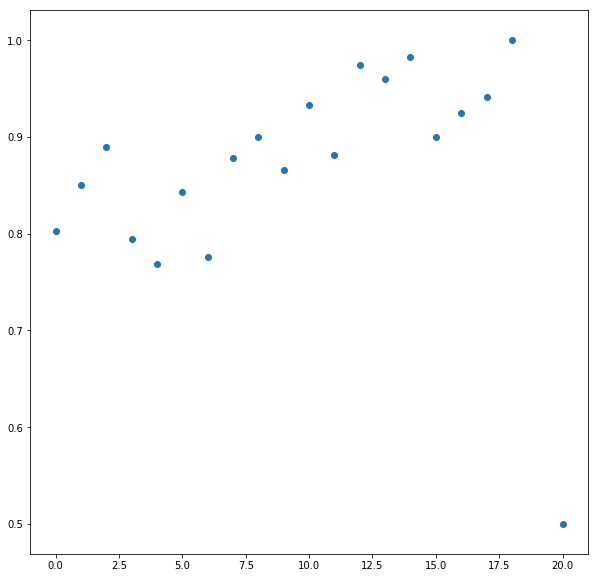

In [4]:
# Your code here
import matplotlib.pyplot as plt
average = data[data['year'] == 97].groupby(['hohedu'])['sc'].mean()
x = data['hohedu'].unique()
plt.figure(figsize = (10, 10))
plt.scatter(x, average)
plt.show()



According to the scatterplot, average enrollment rate increases as the level of household head education increases. However, there is unexpected drop - outlier - on average enrollment rate at 20 years of schooling of head of household where the average enrollment rate was 0.5. 

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households
in treated villages**, before and after treatment.  Specifically, for
each village, calculate the average rate of enrollment of poor
households in treated villages in 1997, then compute the average rate
of enrollment of poor households in treated villages in 1998. Create
two separate histograms showing the distribution of these average
enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the
x-axis at the average value (across all households). Does there appear
to be a difference? Is this difference statistically significant?

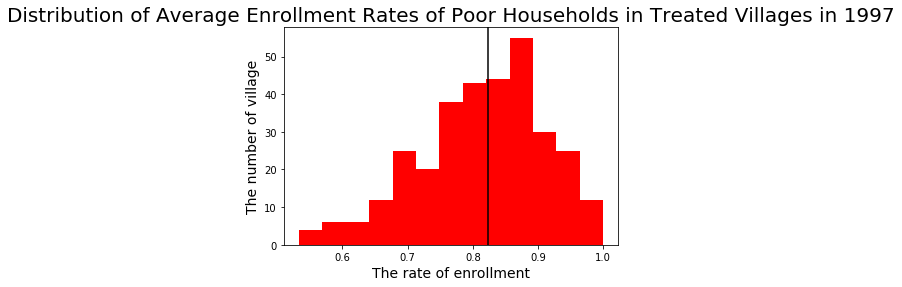

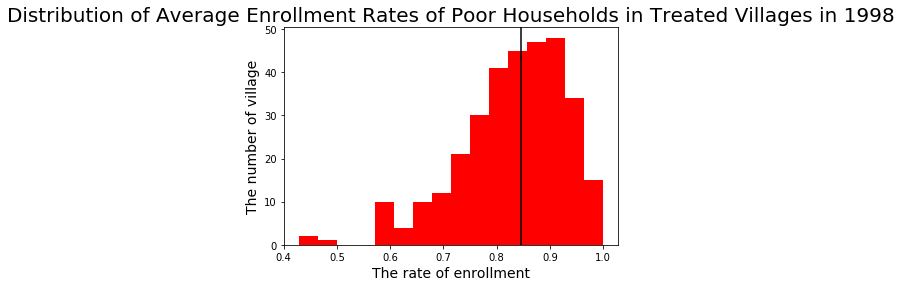

Ttest_indResult(statistic=-2.0157134865156379, pvalue=0.04424870036572115)

In [5]:
# Your code here
import statsmodels.formula.api as smf

mean_enrollment_poor = data[(data['poor'] =='pobre') & (data['year'] == 97) & (data['progresa'] == 'basal')].groupby('village')['sc'].mean()
mean_enrollment_poor2 = data[(data['poor'] =='pobre') & (data['year'] == 98) & (data['progresa'] == 'basal')].groupby('village')['sc'].mean()

ax = plt.axes(frameon=True)
plt.hist(mean_enrollment_poor, rwidth=1000, color="red", bins='auto')
plt.axvline(x = data[(data['poor'] =='pobre') & (data['year'] == 97) & (data['progresa'] == 'basal')]['sc'].mean(), color ='black')
plt.title("Distribution of Average Enrollment Rates of Poor Households in Treated Villages in 1997", fontsize='20')
plt.xlabel('The rate of enrollment', fontsize='14')
plt.ylabel('The number of village', fontsize='14')
plt.show()

ax = plt.axes(frameon=True)
plt.hist(mean_enrollment_poor2, rwidth=1000, color="red", bins='auto')
plt.axvline(x = data[(data['poor'] =='pobre') & (data['year'] == 98) & (data['progresa'] == 'basal')]['sc'].mean(), color ='black')
plt.title("Distribution of Average Enrollment Rates of Poor Households in Treated Villages in 1998", fontsize='20')
plt.xlabel('The rate of enrollment', fontsize='14')
plt.ylabel('The number of village', fontsize='14')
plt.show()

stats.ttest_ind(mean_enrollment_poor, mean_enrollment_poor2)

There appears to be a difference. For example, the mean of the average enrollment rates of poor households is higher in 1998 than in 1997. 1997 and 1998 both have increasing trend between 0.6 and 0.9, but there is a decrease between 0.725 and 0.775 in 1997. Also, the number of village decrease after 0.9 enrollment rate. Also, there appears to be statistically significant difference, because the p-value between two enrollment rates is less than 0.044.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [6]:
# Your code here
mean_enrollment_poor = data[(data['poor'] =='pobre') & (data['year'] == 98) & (data['progresa'] == 'basal')].groupby('village')['sc'].mean()
mean_enrollment_poor2 = data[(data['poor'] =='pobre') & (data['year'] == 98) & (data['progresa'] != 'basal')].groupby('village')['sc'].mean()

ttest = stats.ttest_ind(mean_enrollment_poor, mean_enrollment_poor2)
print(ttest)

Ttest_indResult(statistic=2.5241266257746298, pvalue=0.011905294137542672)


P-value is less than 0.05. Low p-value rejects the null hypothesis that there is no difference between average enrollment rate among poor households in the treatment villages and the control village. There is statistically significant difference between two variables.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.
Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

Note: I recommend to use statsmodels.formula.api as this allows to use
convenient R-style formulas and provedes nice summaries of the results.

In [7]:
# Your code here
import statsmodels.formula.api as smf
results = smf.ols('sc ~ progresa', data=data[(data['poor'] =='pobre') & (data['year'] == 98)]).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           6.64e-17
Time:                        15:40:57   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.00

Based on this model, Progresa increased the log likelihood of a child enrolling by -11926.

My regression estimate has higher p-value compare to my t-test estimate where my regression estimate has 0 p-value, while my t-test estimate has 0.012 p-value. 

Based on this regression model, we can reject the null hypothesis that the treatment effects are zero. It is because p-value is less than 0.05. Thus, a significant difference does exist.

The counterfactual assumption underlying this regression is that there treatment effects are zero.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [8]:
results = smf.ols('sc ~ progresa + age + dist_sec + sex + hohedu + welfare_index + indig', data=data[(data['poor'] =='pobre') & (data['year'] == 98)]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Sun, 11 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:40:59   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5025      0.01

Age, distance to a secondary school, gender, education of household head, and indigenous have p-value less than 0.05. They reject the null hypothesis that there is no differences. Hence, they have statistically significant difference. On the other hand, welfare index has p-value greater than 0.05. It accept the null hypothesis that there is no difference. Hence, it has no statistically significant difference. 

The controls affected the standard error on the treatment by lowering the standard error. For example, treatment lowered the standard error of the progresa by 0.001. 

Coefficient and standard error is slight lower after the treatment than before the treatment. However, t-value is higher, while p-value stays as zero.


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [9]:
# Your code here
print("The difference (between 1997 and 1998) in enrollment rates among poor households in treated villages.")
results = smf.ols('sc ~ year', data=data[(data['poor'] =='pobre') & (data['progresa'] == 'basal')]).fit()
print("Difference: ", results.params[1])
print("Standard Error: ", results.bse)
print()
print("the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.")
results2 = smf.ols('sc ~ year', data=data[(data['poor'] =='pobre') & (data['progresa'] != 'basal')]).fit()
print("Difference", results2.params[1])
print("Standard Error: ", results2.bse)
print()
print("The difference between these two differences is your estimate.")
print(results.params[1] - results2.params[1])

The difference (between 1997 and 1998) in enrollment rates among poor households in treated villages.
Difference:  0.023782233992
Standard Error:  Intercept    0.381940
year         0.003918
dtype: float64

the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.
Difference -0.00754904632728
Standard Error:  Intercept    0.512552
year         0.005259
dtype: float64

The difference between these two differences is your estimate.
0.0313312803193


a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

0.023782233992

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

-0.00754904632728

c) The difference between these two differences is your estimate.

    - 0.0313312803193. It is Lower than the simple difference results.

    - The counterfactual is the underlying assumption is that there is no statistical difference between two differences.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in
  interpreting your coefficients and standard errors, and make sure to
  specify exactly what units you are measuring and estimating.

* How do these estimates of the treatment effect compare to the
  estimates based on the simple difference?

* How do these estimates compare to the difference-in-difference
  estimates from 2.4 above? What accounts for these differences?

* What is the counterfactual assumption underlying this regression? 

In [11]:
# Your code here
result = smf.ols('sc ~ progresa + age + dist_sec + sex + hohedu + welfare_index + indig', data = data[(data['poor'] =='pobre') & (data['year'] == 97)]).fit()
print("Difference")
print(result.params[1])
print("Coefficients")
print(result.params)
print("Standard Errors")
print(result.bse)
print()

result2 = smf.ols('sc ~ progresa + age + dist_sec + sex + hohedu', data = data[(data['poor'] =='pobre') & (data['year'] == 98)]).fit()
print("Difference")
print(result2.params[1])
print("Coefficients")
print(result2.params)
print("Standard Errors")
print(result2.bse)
print()

result3 = smf.ols('sc ~ progresa + age + dist_sec + sex + hohedu + welfare_index + indig', data = data[(data['poor'] =='pobre') &(data['year'] == 98)]).fit()
print("Difference")
print(result3.params[1])
print("Coefficients")
print(result3.params)
print("Standard Errors")
print(result3.bse)
print()

result4 = smf.ols('sc ~ progresa + age + dist_sec + sex + hohedu', data = data[(data['poor'] =='pobre') &(data['year'] == 97)]).fit()
print("Difference")
print(result4.params[1])
print("Coefficients")
print(result4.params)
print("Standard Errors")
print(result4.bse)
print()

print(result2.params[1] - result.params[1], result3.params[1] - result4.params[1])


Difference
0.00449721453978
Coefficients
Intercept            1.467903
progresa[T.basal]    0.004497
age                 -0.065601
dist_sec            -0.009780
sex                  0.036359
hohedu               0.006488
welfare_index        0.000038
indig                0.052694
dtype: float64
Standard Errors
Intercept            0.013148
progresa[T.basal]    0.003814
age                  0.000611
dist_sec             0.000873
sex                  0.003703
hohedu               0.000746
welfare_index        0.000016
indig                0.003977
dtype: float64

Difference
0.0352318985757
Coefficients
Intercept            1.535891
progresa[T.basal]    0.035232
age                 -0.065422
dist_sec            -0.011238
sex                  0.031103
hohedu               0.008731
dtype: float64
Standard Errors
Intercept            0.009337
progresa[T.basal]    0.003992
age                  0.000684
dist_sec             0.000870
sex                  0.003877
hohedu               0.000776
d

The difference-difference of the Progresa treatment in 1997 and 1998 with two different test is 0.0307346840359, while the difference-difference of the Progresa treatment in 1997 and 1998 with other two different variables is 0.0313678638791.

The coefficient and the difference value of the estimates of the treatment effect is lower than the estimates based on the simple difference.

The difference-in-difference for 2.5 was lower than the difference-in-difference for 2.4. More control variables in the difference-in-difference for 2.5 makes lower value.

The counterfactual assumption underlying this regression is the null hypothesis that there is no impact of the progresa on poor people's education.


### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.

The Progresa had a causal impact on the enrollment rates of poor households in Mexico, because of low-value oberserved in simple-difference and low difference between differences in difference-in-difference. In all cases, we rejected the null hypothesis that there is no difference. Thus, the progressa had significant statistical difference.